# Task Statement

Find the minimum and maximum values (and at what points the function gets those values) of the the following **objective function**:

$$F(x_1, x_2)=x_1+3x_2$$

In other words
$$F(x_1, x_2)=x_1+3x_2 \rightarrow min$$
$$F(x_1, x_2)=x_1+3x_2 \rightarrow max$$

 Taking into account given constraints (so-called **feasible region**):

$$4x_1-2x_2\leq12,$$
$$-x_1+3x_2\leq6,$$
$$2x_1+4x_2\geq16,$$
$$x_1\geq0, x_2\geq0.$$

# Implementation Steps

1. Visualize the fisibility area
2. Find boundary points of the fisibility area
3. Find direction (vector gradient) of objective function growing
$$ grad(F) = (\frac{\partial F}{\partial x_1}, \frac{\partial F}{\partial x_2}) = (1, 3) $$
4. Draw the line which ortogonal to the vector gradient 
5. Find intersection of the of the line from step 4 with the boundary points
6. Find values of the objective function in the points found on step 5

# Solution (Graphical Method)

Let us visualize the feasible space (each point of the feasible space satisfies the constraints):

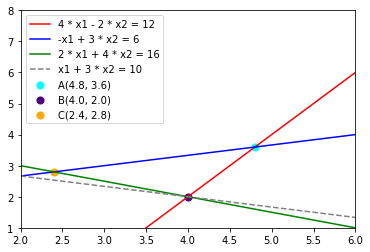

Results:
F(4.0, 2.0) = 10.0
F(4.8, 3.6) = 15.6


In [113]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.animation import FuncAnimation

# returns x2 by x1 for the linear function l: a * x1 + b * x2 = c
def f2(x1, l):
    # x1 = (c - a * x1) / b
    return (l[2] - l[0] * x1) / l[1]
    
    
# Step 1: Visualize fisibility area    
x1_1 = 2
x1_2 = 6
    
plt.plot([x1_1, x1_2], [f2(x1_1, [4, -2, 12]), f2(x1_2, [4, -2, 12])], color='red', label = '4 * x1 - 2 * x2 = 12')
plt.plot([x1_1, x1_2], [f2(x1_1, [-1, 3, 6]), f2(x1_2, [-1, 3, 6])], color='blue', label = '-x1 + 3 * x2 = 6')
plt.plot([x1_1, x1_2], [f2(x1_1, [2, 4, 16]), f2(x1_2, [2, 4, 16])], color='green', label = '2 * x1 + 4 * x2 = 16')

# Step 2: Find boundary points of the fisibility area
# Resolve 3 systems of 2 linear equations
A = np.linalg.solve(np.array([[4, -2], [-1, 3]]), np.array([12, 6]))
B = np.linalg.solve(np.array([[4, -2], [2, 4]]), np.array([12, 16]))
C = np.linalg.solve(np.array([[-1, 3], [2, 4]]), np.array([6, 16]))

plt.scatter(A[0], A[1], s=50, c='cyan', label=f'A({round(A[0], 2)}, {round(A[1], 2)})')
plt.scatter(B[0], B[1], s=50, c='indigo', label=f'B({round(B[0], 2)}, {round(B[1], 2)})')
plt.scatter(C[0], C[1], s=50, c='orange', label=f'C({round(C[0], 2)}, {round(C[1], 2)})')

plt.xlim([2, 6])
plt.ylim([1, 8])


#plt.grid()


#fig = plt.figure()
#anim = animation.FuncAnimation(fig, animate, init_func=init, frames=500, interval=20, blit=True)

# Step 3: Find vector of objective function growing
# The following line is ortogonal to vector v = (1, 3)

# Step 4: Draw the line which ortogonal to the vector gradient
C = 10
plt.plot([x1_1, x1_2], [f2(x1_1, [1, 3, C]), f2(x1_2, [1, 3, C])], '--', color='gray', label = f'x1 + 3 * x2 = {C}')

# Step 5: Find intersection of the of the line from step 4 with the boundary points
plt.legend(loc='upper left')
plt.show()


# Step 6: Find values of the objective function in the points found on step 5
def F(x):
    return x[0] + 3 * x[1]

min = F(B)
max = F(A)

print("Results:")
print(f'F({B[0]}, {B[1]}) = {round(min, 2)}')
print(f'F({A[0]}, {A[1]}) = {round(max, 2)}')